<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Practice_and_Assignments/blob/main/PCA_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
X = digits.data
y = digits.target

In [11]:
# View the features data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [12]:
# View the target labels
print(digits.target)

[0 1 2 ... 8 9 8]


In [34]:
pca = PCA(n_components=2)

In [35]:
X_pca = pca.fit_transform(X)

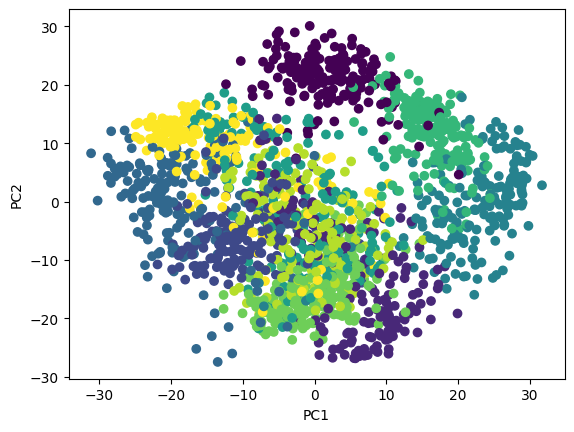

In [37]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

# Extract only features
X = digits.data

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the covariance matrix
covariance = np.cov(X_scaled.T)

# Compute the minimum covariance
min_covariance = np.min(covariance)

In [39]:
print("Minimum covariance:", min_covariance)

Minimum covariance: -0.57051363323811


In [41]:
num_features = digits.data.shape[1]

print("Number of features:", num_features)

Number of features: 64


In [42]:
# Calculate eigenvalues and eigenvectors
covariance_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [43]:
# Create an array of eigenpairs
eigenpairs = np.column_stack((eigenvalues, eigenvectors))

In [44]:
# Sort eigenpairs in descending order based on eigenvalues
eigenpairs_sorted = eigenpairs[eigenvalues.argsort()[::-1]]

In [45]:
# Compute total sum of eigenvalues
total_eigenvalue = sum(eigenvalues)

In [46]:
# Compute explained variance for each eigenvalue
explained_variance = eigenvalues / total_eigenvalue

In [47]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755 0.61655561 0.64232616
 0.66507919 0.68735099 0.70900328 0.72814495 0.74590042 0.76228111
 0.77824572 0.79313763 0.80661732 0.81933664 0.83099501 0.84157148
 0.85132464 0.86077023 0.86940036 0.87776679 0.88574372 0.89320844
 0.90046426 0.90738337 0.91392246 0.92033038 0.92624422 0.93195585
 0.93719222 0.93801757 0.94283564 0.94737284 0.94840979 0.95264142
 0.95670195 0.9606728  0.96192381 0.96327499 0.96475262 0.96636498
 0.96804444 0.96987763 0.97183275 0.97386873 0.9760513  0.97839613
 0.98196106 0.98455281 0.9873177  0.99072557 0.99361133 0.99688968
 1.         1.         1.         1.        ]


In [48]:
# Find the index of the eigenvalue where the cumulative variance exceeds the desired threshold
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to explain {threshold*100}% variance: {n_components}")

Number of components to explain 95.0% variance: 42


In [49]:
# Select the top n_components eigenvectors
selected_eigenvectors = eigenpairs_sorted[:, 1:n_components+1]

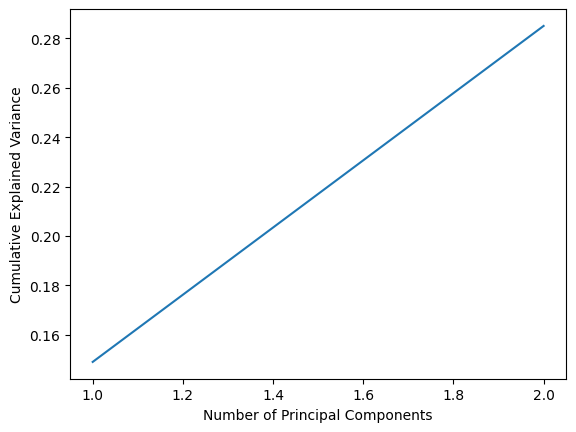

In [50]:
# Calculate the explained variance ratio
explained_variances = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variances = np.cumsum(explained_variances)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variances)+1), cumulative_variances)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [51]:
cumulative_variances

array([0.14890594, 0.28509365])

In [52]:
# Create a PCA object with n_components equal to the number of features
pca = PCA(n_components=X_scaled.shape[1])

# Fit the data to the PCA object
pca.fit(X_scaled)

# Compute the explained variance ratio for each principal component
explained_variances = pca.explained_variance_ratio_

# Compute the cumulative explained variance ratio
cumulative_variances = np.cumsum(explained_variances)

# Compute the maximum explained variance ratio
max_explained_variance = np.max(explained_variances)

In [53]:
max_explained_variance

0.120339160977349

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

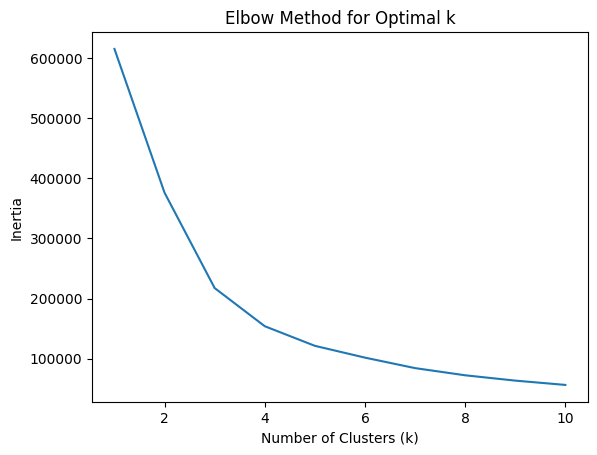

In [54]:
from sklearn.cluster import KMeans

# assume pca_data is the PCA fitted data
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

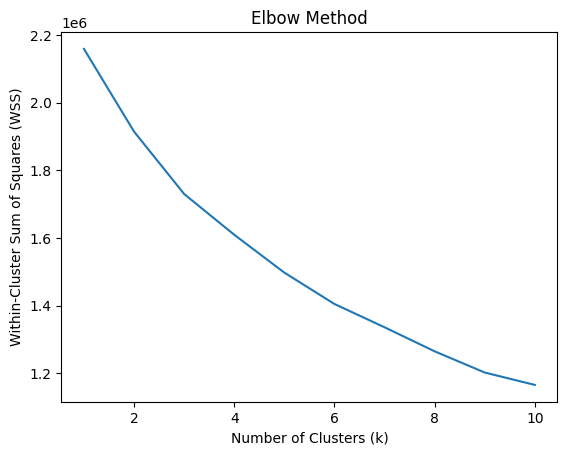

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create a list to store WSS values for different k values
wss = []

# fit KMeans models for different k values and calculate WSS
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# plot WSS against k values
plt.plot(range(1, 11), wss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method')
plt.show()

In [61]:
# Use KMeans to predict the labels of the test data
labels = kmeans.predict(X_pca)

# Count the number of images classified as 8
count = np.count_nonzero(labels == 8)

print("Number of images classified as 8:", count)

ValueError: ignored

In [64]:
count = 0
for label in X_pca:
    if label == 8:
        count += 1
        
print("Number of images classified as 8:", count)

ValueError: ignored